<a href="https://colab.research.google.com/github/Nasabunc09/Pre_Entrega3_DataScience/blob/main/Notebooks/Proyecto4x4YPF_transflogar%C3%ADtmica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 4x4 YPF - Primer pilar Vaca Muerta**

El proyecto de modelado busca seguir la linea de pensamiento de desarrollo de la compañía YPF, en la actualidad este proyecto plantea cuadruplicar el crecimiento de la firma en los próximos 4 años. En primordial que este objetivo esta centrado en 4 pilares, del cual solo vamos a focalizar en el primero, que es el crecimiento de Vaca Muerta a corto plazo.

La estrategia se basa en reducir costos operativos, optimizar los tiempos de perforación y adoptar un enfoque más eficiente en la gestión financiera. La compañía ha logrado reducir los tiempos de perforación de aproximadamente un año a 170 días, mediante mejoras técnicas y operativas.

Este plan de transformación busca posicionar a YPF como una empresa más eficiente, rentable y alineada con las tendencias internacionales del sector energético, con una visión clara en el desarrollo del shale en Argentina.


**Modelado**


En la pre entrega 2, realizamos la transformación de todas las features utilizando One Hot Encoder, ahora vamos a limpiar y decidir en función al análisis exploratorio que features tener en consideración para el modelado.

Como observamos anteriormente tanto la producción de petróleo como la producción de gas son dos datos que queremos predecir para los próximos 4 años, sin embargo el análisis estará centrado en la Cuenca Neuquina, es decir, Vaca Muerta y las cinco principales áreas de permiso de concesión tanto para la producción de petróleo como para la producción de gas.

Así como también tenemos que mencionar que el dataset está centrado únicamente en la producción de lo no convencional, es decir, de aquella extracción que requiere tecnologías más avanzadas, costosas o intensivas en recursos debido a las características del yacimiento o del propio hidrocarburo.

Finalmente, cabe mencionar que la producción de petróleo y gas se sujeta a dos subtipos de recursos, estos son shale y tight, los mismos se diferencian según el tipo de roca y suelen requerir técnicas como la fractura hidráulica (fracking) para su extracción. Mientras que el shale se extrae de la roca sedimentaria rica en materia orgánica que actúa como fuente y reservorio del hidrocarburo, el tight se encuentra en rocas porosas pero de baja permeabilidad, como areniscas o calizas muy cementadas.

In [11]:
#Descargamos todas las librerías necesarias para el desarrollo del proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [12]:
#Cargamos el dataset transformado en la segunda pre-entrega
Produccion_ypf = pd.read_csv('/content/prod_encoded_df.csv')

#Aplicamos la función head() para visualizar las primeras 5 observaciones del dataset
Produccion_ypf.head().astype(int)

,Tipo de pozo_Gasífero,Tipo de pozo_Inyección de Agua,Tipo de pozo_Otro tipo,Tipo de pozo_Petrolífero,Tipo de pozo_Sumidero,Tipo de recurso_NO CONVENCIONAL,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_AGUADA DEL CHAÑAR,...,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Producción de agua,Profundidad
0,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,32,172,0,3844
1,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2827
2,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2977
3,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4092
4,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,55,3,0,4945


In [13]:
#Con la función columns podemos observar mejor el nombre de todas las columnas del dataset, que en este caso son 47 columnas
Produccion_ypf.columns.tolist()

['Tipo de pozo_Gasífero',
 'Tipo de pozo_Inyección de Agua',
 'Tipo de pozo_Otro tipo',
 'Tipo de pozo_Petrolífero',
 'Tipo de pozo_Sumidero',
 'Tipo de recurso_NO CONVENCIONAL',
 'Subtipo de recurso_SHALE',
 'Subtipo de recurso_TIGHT',
 'Area de permiso de concesion_AGUADA DE LA ARENA',
 'Area de permiso de concesion_AGUADA DEL CHAÑAR',
 'Area de permiso de concesion_AL NORTE DE LA DORSAL',
 'Area de permiso de concesion_BAJO DEL TORO  ',
 'Area de permiso de concesion_BAJO DEL TORO NORTE',
 'Area de permiso de concesion_BANDURRIA SUR',
 'Area de permiso de concesion_CERRO ARENA ',
 'Area de permiso de concesion_CERRO LAS MINAS ',
 'Area de permiso de concesion_CERRO MANRIQUE',
 'Area de permiso de concesion_CHIHUIDO DE LA SIERRA NEGRA',
 'Area de permiso de concesion_CN VII A',
 'Area de permiso de concesion_DADIN',
 'Area de permiso de concesion_EL OREJANO',
 'Area de permiso de concesion_ESTACION FERNANDEZ ORO',
 'Area de permiso de concesion_FILO MORADO',
 'Area de permiso de conc

In [14]:
#Creamos una copia del dataset original
Produccion_ypf_copia = Produccion_ypf.copy()

#Seleccionamos las columnas que no vamos a utilizar
columnas_a_eliminar = [
    'Tipo de pozo_Inyección de Agua',
    'Tipo de pozo_Otro tipo',
    'Tipo de pozo_Sumidero',
    'Tipo de recurso_NO CONVENCIONAL',
    'Producción de agua',
    'Area de permiso de concesion_AGUADA DEL CHAÑAR',
    'Area de permiso de concesion_AL NORTE DE LA DORSAL',
    'Area de permiso de concesion_BAJO DEL TORO',
    'Area de permiso de concesion_CERRO ARENA ',
    'Area de permiso de concesion_CERRO LAS MINAS ',
    'Area de permiso de concesion_CERRO MANRIQUE',
    'Area de permiso de concesion_CHIHUIDO DE LA SIERRA NEGRA',
    'Area de permiso de concesion_CN VII A',
    'Area de permiso de concesion_DADIN',
    'Area de permiso de concesion_BAJO DEL TORO NORTE',
    'Area de permiso de concesion_ESTACION FERNANDEZ ORO',
    'Area de permiso de concesion_FILO MORADO',
    'Area de permiso de concesion_LA ANGOSTURA SUR I',
    'Area de permiso de concesion_LA ANGOSTURA SUR II',
    'Area de permiso de concesion_LA RIBERA BLOQUE I',
    'Area de permiso de concesion_LA RIBERA BLOQUE II',
    'Area de permiso de concesion_LAS TACANAS'
]

#Con la función drop eliminamos las columnas que consideramos que no son necesarias para el análisis, en este caso solo dejamos las principales áreas de permiso de concesión por producción de petróleo y gas
Produccion_ypf = Produccion_ypf.drop(columns=columnas_a_eliminar, errors='ignore')

#Visualizamos las columnas con las que vamos a trabajar
Produccion_ypf.head()

,Tipo de pozo_Gasífero,Tipo de pozo_Petrolífero,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_BAJO DEL TORO,Area de permiso de concesion_BANDURRIA SUR,Area de permiso de concesion_EL OREJANO,Area de permiso de concesion_LA AMARGA CHICA,Area de permiso de concesion_LA RIBERA BLOQUE I,...,Area de permiso de concesion_LOS CALDENES,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Profundidad
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,172.0,3844.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2827.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2977.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4092.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,3.0,4945.0


In [15]:
#aplicamos astype para visualizar los datos en números enteros
Produccion_ypf.astype(int)

,Tipo de pozo_Gasífero,Tipo de pozo_Petrolífero,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_BAJO DEL TORO,Area de permiso de concesion_BANDURRIA SUR,Area de permiso de concesion_EL OREJANO,Area de permiso de concesion_LA AMARGA CHICA,Area de permiso de concesion_LA RIBERA BLOQUE I,...,Area de permiso de concesion_LOS CALDENES,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Profundidad
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,32,172,3844
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2827
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2977
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4092
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,55,3,4945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56413,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2046
56414,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1642,101,5889
56415,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2441,153,0
56416,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4491


In [16]:
#Nuevamente aplicamos la función columns para visualizar como quedó el dataset con las columnas eliminadas, ahora son 29 columnas
Produccion_ypf.columns.tolist()

['Tipo de pozo_Gasífero',
 'Tipo de pozo_Petrolífero',
 'Subtipo de recurso_SHALE',
 'Subtipo de recurso_TIGHT',
 'Area de permiso de concesion_AGUADA DE LA ARENA',
 'Area de permiso de concesion_BAJO DEL TORO  ',
 'Area de permiso de concesion_BANDURRIA SUR',
 'Area de permiso de concesion_EL OREJANO',
 'Area de permiso de concesion_LA AMARGA CHICA',
 'Area de permiso de concesion_LA RIBERA BLOQUE I ',
 'Area de permiso de concesion_LA RIBERA BLOQUE II  ',
 'Area de permiso de concesion_LAS MANADAS',
 'Area de permiso de concesion_LAS TACANAS ',
 'Area de permiso de concesion_LOMA AMARILLA SUR',
 'Area de permiso de concesion_LOMA CAMPANA',
 'Area de permiso de concesion_LOMA DEL MOLLE',
 'Area de permiso de concesion_LOMA LA LATA - SIERRA BARROSA',
 'Area de permiso de concesion_LOS CALDENES',
 'Area de permiso de concesion_NARAMBUENA',
 'Area de permiso de concesion_OCTOGONO',
 'Area de permiso de concesion_PASO DE LAS BARDAS NORTE',
 'Area de permiso de concesion_RINCON DEL MANGRUL

### **Regresión Lineal con transformación Logarítmica**

Es un modelo de regresión que se utiliza cuando el modelo lineal no logra un buen ajuste.
Este modelo es recomendable aplicarlo en casos como:
Reducir la heterocedasticidad: Cuando los errores en el modelo muestran una variación que aumenta con el valor de la variable dependiente, aplicar una transformación logarítmica puede estabilizar la varianza y cumplir mejor con los supuestos de la regresión lineal.
Modelar variables con distribución sesgada: En casos en los que la variable dependiente tiene una distribución sesgada hacia la derecha (por ejemplo, ingresos, tamaño de empresas, duración en ciertos procesos), transformar los datos con logaritmos ayuda a normalizar la distribución.

In [17]:
#es la copia del dataframe
Produccion_ypf_copia2 = Produccion_ypf.copy()

In [18]:
#Estas columnas son variables dependientes (targets) y las estámos quitando para entrenar un modelo con el resto de las variables (predictoras).
x = Produccion_ypf.drop(['Produccion de Petroleo','Produccion de Gas'], axis=1)

In [19]:
x.head()

,Tipo de pozo_Gasífero,Tipo de pozo_Petrolífero,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_BAJO DEL TORO,Area de permiso de concesion_BANDURRIA SUR,Area de permiso de concesion_EL OREJANO,Area de permiso de concesion_LA AMARGA CHICA,Area de permiso de concesion_LA RIBERA BLOQUE I,...,Area de permiso de concesion_LOMA DEL MOLLE,Area de permiso de concesion_LOMA LA LATA - SIERRA BARROSA,Area de permiso de concesion_LOS CALDENES,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Profundidad
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3844.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2827.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2977.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4092.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4945.0


In [20]:
#almacena esa lista de nombres.
lista_atributos = x.columns

In [21]:
#en la variable y, que representa las variables objetivo (targets) en modelos predictivos
y = Produccion_ypf[['Produccion de Petroleo','Produccion de Gas']]

In [22]:
# Transformación logarítmica de la variable objetivo
# log(1 + y), para evitar problemas con valores cero
y_log = np.log1p(y)

In [23]:
#x = se convierte en array con atributos/predictoras
#y = se convierte en array con targets (logarítmicos)
x, y =np.array(x), np.array(y_log)

In [24]:
#los 10 primeras filas
y_log[:10]

,Produccion de Petroleo,Produccion de Gas
0,3.496508,5.153292
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,4.025352,1.386294
5,0.000000,0.000000
6,6.917706,5.187386
7,0.000000,0.000000
8,2.397895,3.135494
9,6.487684,5.241747


### **Separando Train-Test**

* Train (entrenamiento) → lo usás para entrenar el modelo
* Test (prueba) → lo usás para evaluar qué tan bien predice el modelo en datos nuevos



In [25]:
# Importamos la librearia para separar el dataset.
from sklearn.model_selection import train_test_split

In [26]:
#un numero aleatorio para fijar cuantas veces testeamos
#test_size=0.2: reserva el 20% de los datos para prueba
#random_state=42: fija la "semilla" aleatoria para que la división sea siempre la misma si se corre más de una vez (reproducibilidad)
X_train, X_test, y_train_log, y_test_log = train_test_split(x, y_log, test_size=0.2,random_state=42)

In [27]:
x.shape

(56418, 25)

In [28]:
#X_train: subconjunto de x para entrenar el modelo (80%)
X_train.shape

(45134, 25)

In [29]:
y_test_log.shape

(11284, 2)

In [30]:
#X_test: subconjunto de x para evaluar el modelo (20%)
X_test.shape

(11284, 25)

In [31]:
#Porque usamos LinearRegression() en una transformacion logaritmica
#Porque aunque transformes la variable dependiente (como aplicar log(y)), seguís buscando una relación lineal
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train_log)

LinearRegression()

In [32]:
#predicción en escala logarítmica
y_pred_log = model.predict(X_test)

In [33]:
# Volver a la escala original
y_pred = np.expm1(y_pred_log)  # inversa de log1p: exp(y) - 1
y_test = np.expm1(y_test_log)

In [34]:
#Metricas de error, que indican que tan bien predice el modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 343.5754054663587
RMSE: 1002.5883718190237
R²: 0.06830122885758383


*MAE* – Error Absoluto Medio: Es el promedio del valor absoluto de los errores entre lo que predijo el modelo (y_pred) y los valores reales (y_test).
Se interpreta como: en promedio, el modelo se equivoca por unos 343 unidades (por ejemplo, $343 si estás prediciendo precios). Más bajo = mejor.

*RMSE* – Raíz del Error Cuadrático Medio:
Penaliza más fuerte los errores grandes, porque eleva al cuadrado los errores antes de promediar.
Luego toma la raíz cuadrada para devolver el resultado en la misma unidad que la variable original.
RMSE alto significa errores grandes en algunas predicciones.

*R²* – Coeficiente de Determinación:
Mide cuánta varianza de la variable dependiente está explicando tu modelo.
Va de 0 a 1 (aunque puede ser negativo si el modelo es muy malo):
1 → modelo perfecto
0 → el modelo no explica nada (tan malo como predecir la media)
< 0 → peor que predecir la media
R² ≈ 0.07, lo que indica que el modelo no explica bien los datos. Apenas un 7% de la variación en y está explicada por x

### ***Modelo Residuo***

Los residuos te muestran qué tan lejos estuvo la predicción del modelo respecto al valor real. Analizar los residuos es clave para verificar:

*si el modelo está sesgado

*si hay patrones no capturados por el modelo

*si los errores son grandes (outliers)

Forma de y_test: (11284, 2)
Forma de y_pred: (11284, 2)


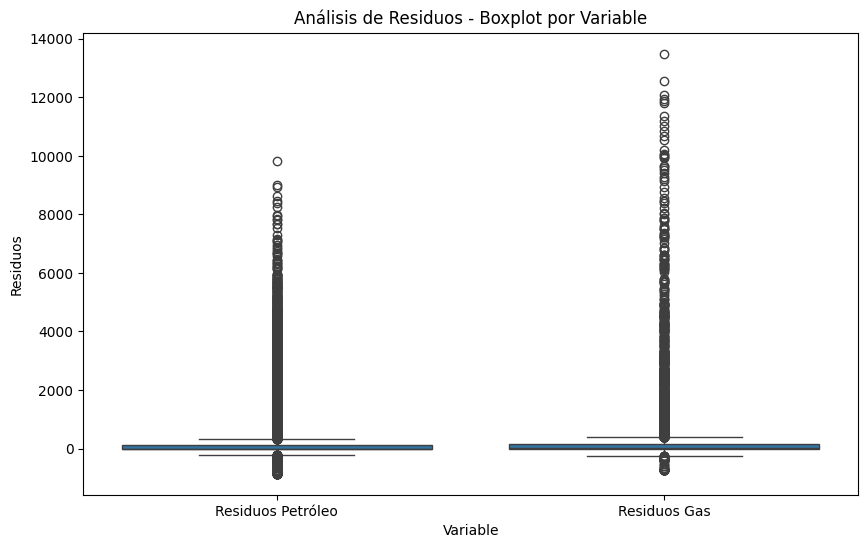

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Verificamos forma de y_test y y_pred
print("Forma de y_test:", y_test.shape)
print("Forma de y_pred:", y_pred.shape)

# Aseguramos que y_test y y_pred son arrays 2D
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Confirmar que tienen 2 columnas
if y_test.shape[1] == 2 and y_pred.shape[1] == 2:
    # Crear DataFrames con nombres claros
    y_test_df = pd.DataFrame(y_test, columns=['Petróleo', 'Gas'])
    y_pred_df = pd.DataFrame(y_pred, columns=['Petróleo', 'Gas'])

    # Calcular los residuos
    residuals_df = y_test_df - y_pred_df
    residuals_df.columns = ['Residuos Petróleo', 'Residuos Gas']

    # Transformar a formato largo para seaborn
    residuals_long = residuals_df.melt(var_name='Variable', value_name='Residuo')

    # Asegurar que no hay NaN
    residuals_long.dropna(inplace=True)

    # Graficar
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Variable', y='Residuo', data=residuals_long)
    plt.title('Análisis de Residuos - Boxplot por Variable')
    plt.ylabel('Residuos')
    plt.show()
else:
    print("Error: y_test o y_pred no tienen 2 columnas. Revisa la forma del modelo.")

***Explicacion del boxplot***

El eje Y representa el tamaño del residuo (es decir, el error).

El eje X indica la variable ('Petróleo' o 'Gas').

Parece haber asimetría o muchos outliers especialmente hacia valores positivos → puede indicar que el modelo subestima algunas veces, generando errores grandes.

Si la caja está muy desbalanceada o el centro (mediana) está lejos de 0, puede haber sesgo en la predicción.

Valores muy altos (> 12000) en residuos indican que el modelo falló seriamente en ciertos casos (grandes errores de predicción).

### ***Modelo de Predicción***

El modelo intenta predecir la producción de petróleo y gas con datos que nunca ha visto.

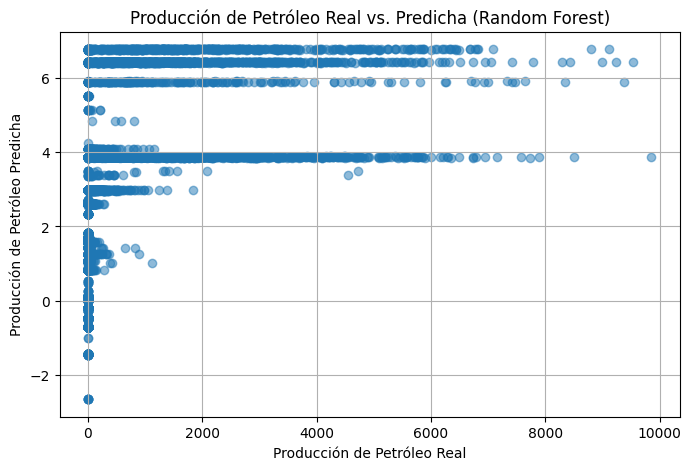

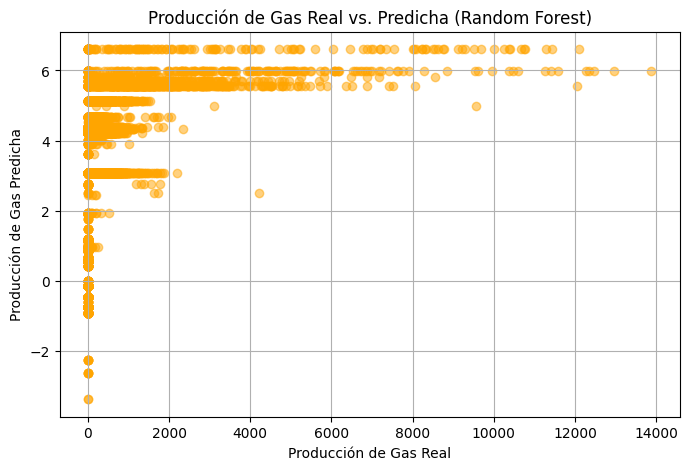

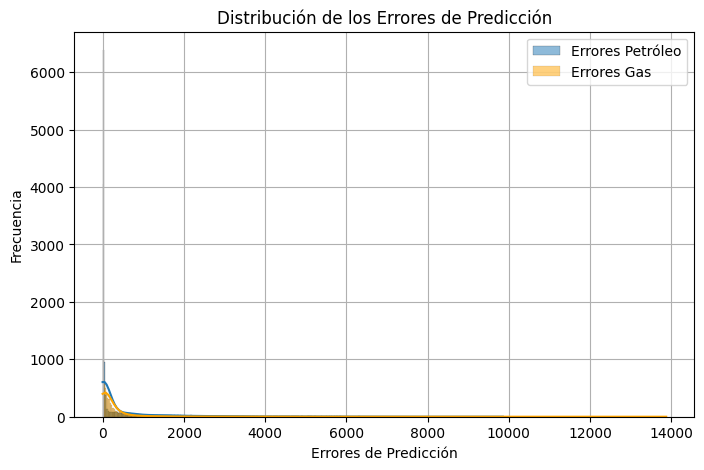

In [36]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Visualizar los resultados para 'Produccion de Petroleo' (primera columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5)
plt.xlabel('Producción de Petróleo Real')
plt.ylabel('Producción de Petróleo Predicha')
plt.title('Producción de Petróleo Real vs. Predicha (Random Forest)')
plt.grid(True)
plt.show()

# Visualizar los resultados para 'Produccion de Gas' (segunda columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 1], y_pred[:, 1], alpha=0.5, color='orange')
plt.xlabel('Producción de Gas Real')
plt.ylabel('Producción de Gas Predicha')
plt.title('Producción de Gas Real vs. Predicha (Random Forest)')
plt.grid(True)
plt.show()

# También puedes visualizar la distribución de los errores
errors_petroleo = y_test[:, 0] - y_pred[:, 0]
errors_gas = y_test[:, 1] - y_pred[:, 1]

plt.figure(figsize=(8, 5))
sns.histplot(errors_petroleo, kde=True, label='Errores Petróleo')
sns.histplot(errors_gas, kde=True, label='Errores Gas', color='orange')
plt.xlabel('Errores de Predicción')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Errores de Predicción')
plt.legend()
plt.grid(True)
plt.show()

Interpretación de los gráficos

*Gráficos de dispersión: valores reales vs. predichos*

Eje X: Producción real de Petróleo
Eje Y: Producción predicha
Si los puntos están cerca de una línea diagonal (y = x), significa que el modelo predijo bien.

*Gráfico de distribucción de los Errores de Predicción*

El eje X muestra el tamaño del error de predicción.
El eje Y muestra la frecuencia de esos errores.
Si los errores están centrados cerca de 0 y tienen forma simétrica, el modelo es preciso y no está sesgado.
Si los errores son muy dispersos o asimétricos, hay problemas (como sesgo o outliers).

### **Random Forest**

Es un algoritmo de aprendizaje automático supervisado que se usa para solucionar problemas de clasificación y regresión. Construye árboles de decisión a partir de diferentes muestras y toma su voto mayoritario para decidir la clasificación y el promedio en caso de regresión.
Ventajas. Los Bosques Aleatorios se consideran un método muy preciso y robusto debido al número de árboles de decisión que participan en el proceso. No sufre el problema del sobreajsute. La razón principal es que toma el promedio de toas las predicciones, lo que anula los sesgos.

In [37]:
#importo las librerias de RandomForestRegressor y error medio absoluto
from sklearn.ensemble import RandomForestRegressor

In [38]:
from sklearn.metrics import mean_absolute_error

In [39]:
# Inicializo el modelo
regresor = RandomForestRegressor(criterion='absolute_error', random_state=25, n_estimators=20,max_depth=5,max_features='sqrt')

In [40]:
# Entreno el modelo
regresor.fit(X_train, y_train_log);

In [41]:
regresor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 25,
 'verbose': 0,
 'warm_start': False}

In [42]:
# Predigo los valores para el set de testeo
y_pred = regresor.predict(X_test)

y_pred

array([[6.82234865, 5.12583749],
       [0.19250738, 1.18201441],
       [2.88570746, 2.64536947],
       ...,
       [5.01412291, 3.51190648],
       [5.01412291, 3.51190648],
       [5.45785196, 4.29798322]])

In [43]:
# Calculo el error medio absoluto
mean_absolute_error(y_test, y_pred)

403.2820854346189

En promedio, las predicciones de tu modelo se desvían de los valores reales por 403.28 unidades.

Si tu variable es "producción diaria en barriles", entonces el modelo se equivoca, en promedio, en unos 403 barriles por día.

Dependerá de la escala de tus datos:

Si la producción típica es de 10,000 barriles, un error de 403 puede ser aceptable (~4% de error).

Si la producción es de 1,000 barriles, ese error es más significativo (~40%).

In [44]:
#Consultar si el error tiene que ver con que exista un dato valor a 0 entonces en la feature Producción de Petróleo y Producción de gas contiene algun 0 que hace que la división no se pueda realizar
#Agregar un pequeño valor epsilon para evitar división por cero
epsilon = 1e-10
mape = np.mean(np.abs((y_test - y_pred) / (y_test + epsilon))) * 100

y_test - y_pred → calcula el error absoluto entre el valor real y el predicho.

/ y_test → lo convierte en un porcentaje respecto al valor real.

np.abs(...) → toma el valor absoluto (para que todos los errores sean positivos).

np.mean(...) → saca el promedio de todos esos porcentajes.

* 100 → lo convierte en porcentaje final.

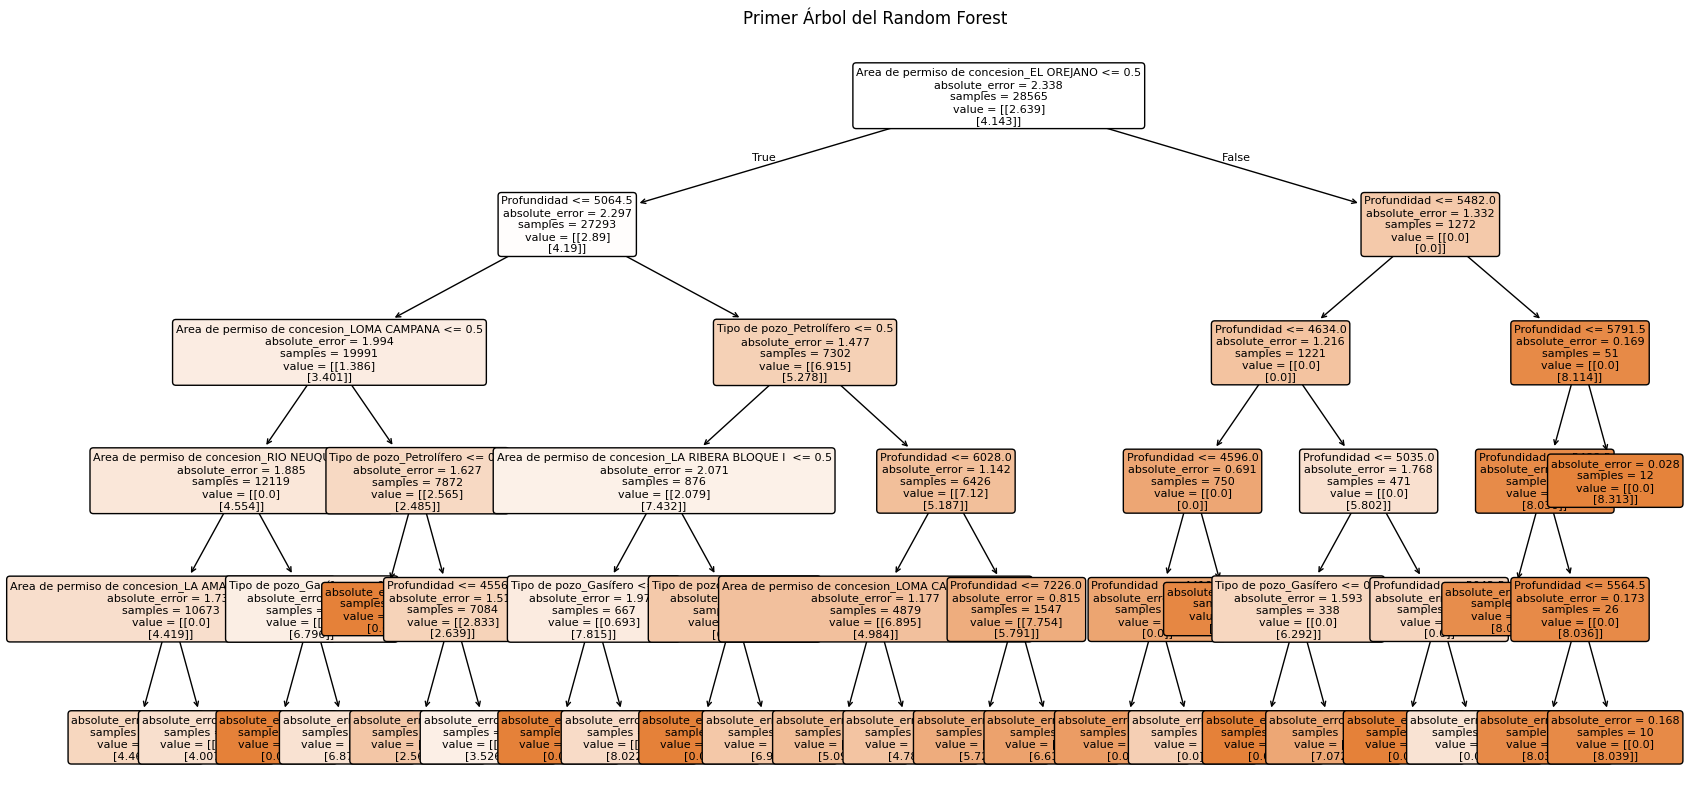

In [45]:
# gráfico de arbol
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Asumo que ya tienes un modelo de RandomForestRegressor entrenado llamado 'regresor'
# y que 'lista_atributos' contiene los nombres de las características.

# Asegúrate de que el modelo es un RandomForestRegressor
if isinstance(regresor, RandomForestRegressor):
  # Visualiza el primer árbol del bosque
  plt.figure(figsize=(20, 10))
  plot_tree(regresor.estimators_[0],
            feature_names=lista_atributos.tolist(),  # Asegúrate de que sea una lista
            filled=True,
            rounded=True,
            fontsize=8)
  plt.title("Primer Árbol del Random Forest")
  plt.show()
else:
  print("El modelo 'regresor' no es un RandomForestRegressor.")

Interpretacion del gráfico:

El gráfico es como un mapa de decisiones que usa el modelo para predecir.

Cada nodo representa una pregunta sobre un valor.

Sigues las ramas según las respuestas hasta llegar a una predicción final.

### **Support Vector Machine**

Una máquina de vectores de soporte (SVM) es un algoritmo de machine learning supervisado que clasifica los datos mediante la búsqueda de una línea o un hiperplano óptimos que maximice la distancia entre cada clase en un espacio N-dimensional.

In [46]:
#importamos librerias de SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

In [47]:
#crea y entrena un modelo de regresión de vectores de soporte de múltiples salidas
multi_svr = MultiOutputRegressor(SVR())
multi_svr.fit(X_train, y_train_log)

MultiOutputRegressor(estimator=SVR())

In [48]:
multi_svr.get_params()

{'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__coef0': 0.0,
 'estimator__degree': 3,
 'estimator__epsilon': 0.1,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVR(),
 'n_jobs': None}

In [49]:
y_pred_svr = multi_svr.predict(X_test)

y_pred_svr

array([[7.75848137, 5.78657385],
       [0.10752568, 3.22347283],
       [1.11000392, 3.10984188],
       ...,
       [3.70125774, 3.86879198],
       [2.91496768, 3.59044538],
       [5.19372229, 4.47598273]])

In [50]:
# Calculo el error medio absoluto
mean_absolute_error(y_test, y_pred_svr)

403.82046139680494

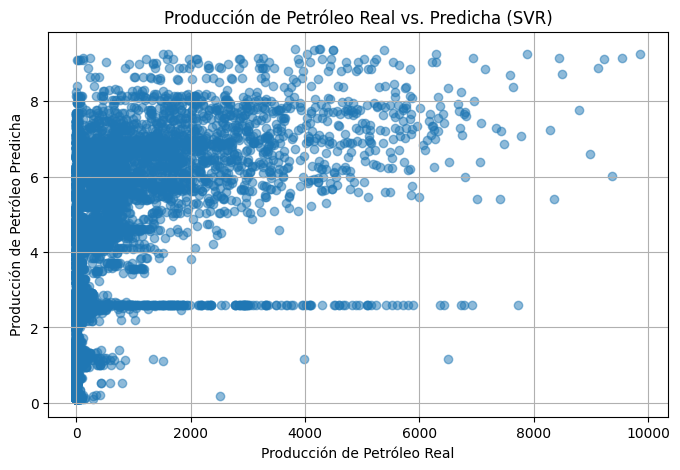

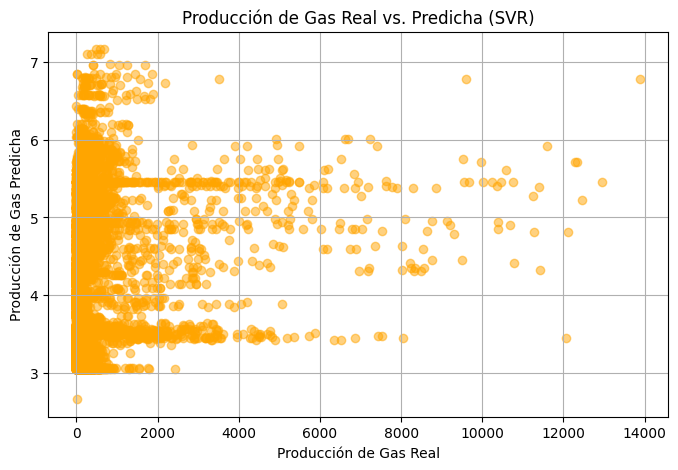

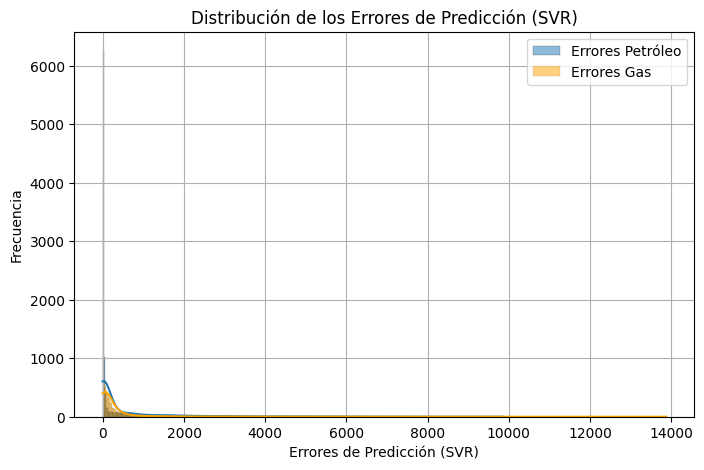

In [51]:
# gráfico support vector machine
import matplotlib.pyplot as plt
# Visualizar los resultados para 'Produccion de Petroleo' (primera columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 0], y_pred_svr[:, 0], alpha=0.5)
plt.xlabel('Producción de Petróleo Real')
plt.ylabel('Producción de Petróleo Predicha')
plt.title('Producción de Petróleo Real vs. Predicha (SVR)')
plt.grid(True)
plt.show()

# Visualizar los resultados para 'Produccion de Gas' (segunda columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 1], y_pred_svr[:, 1], alpha=0.5, color='orange')
plt.xlabel('Producción de Gas Real')
plt.ylabel('Producción de Gas Predicha')
plt.title('Producción de Gas Real vs. Predicha (SVR)')
plt.grid(True)
plt.show()

# También puedes visualizar la distribución de los errores
errors_petroleo_svr = y_test[:, 0] - y_pred_svr[:, 0]
errors_gas_svr = y_test[:, 1] - y_pred_svr[:, 1]

plt.figure(figsize=(8, 5))
sns.histplot(errors_petroleo_svr, kde=True, label='Errores Petróleo')
sns.histplot(errors_gas_svr, kde=True, label='Errores Gas', color='orange')
plt.xlabel('Errores de Predicción (SVR)')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Errores de Predicción (SVR)')
plt.legend()
plt.grid(True)
plt.show()


##### *Interpretacion del grafico*

El gráfico compara los valores reales (de prueba) con los valores predichos por el modelo SVR (Support Vector Regression) para dos variables:

*Producción de Petróleo

*Producción de Gas


##### *Cómo interpretarlo:*

Eje X: Valores reales (y_test) de producción (petróleo o gas).

Eje Y: Valores que el modelo predijo (y_pred_svr) para esas mismas variables.

Cada punto representa un ejemplo/test en el conjunto de datos.

Si el modelo fuera perfecto, todos los puntos estarían exactamente sobre la línea diagonal y = x, es decir, donde valor real = valor predicho.

##### *Qué indica la dispersión:*
    
Si los puntos están muy cerca de la diagonal, el modelo predice bien.

Si están muy dispersos o alejados, el modelo tiene errores grandes en esas predicciones.

La transparencia (alpha=0.5) ayuda a ver dónde hay mayor concentración de puntos (más puntos sobrepuestos se ven más oscuros).


### **XGBoost**

Se basa en el marco de trabajo del boosting. Boosting es una técnica de conjunto donde se agregan nuevos modelos para corregir los errores cometidos por los modelos existentes.
La idea clave detrás de XGBoost es que podemos utilizar el marco de trabajo de boosting en el corazón de AdaBoost (Adaptive Boosting - Aumento Adaptativo, es un algoritmo de aprendizaje automático ajusta los pesos de las instancias de entrenamiento en cada iteración) y aplicarlo a cualquier función de pérdida diferenciable. Esto hace que XGBoost sea aplicable a una amplia variedad de problemas de regresión y clasificación.
La principal ventaja de XGBoost es su velocidad de ejecución superior y su rendimiento del modelo. También tiene regularización incorporada que ayuda a prevenir el sobreajuste. XGBoost también es capaz de manejar valores faltantes y proporciona varias formas de tratar valores atípicos.

In [52]:
#importamos la libreria de XGBoost
from xgboost import XGBRegressor

In [53]:
modelo_xgb = XGBRegressor(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.3,
    subsample=1.0,
    colsample_bytree=1.0,
    objective='reg:squarederror',  # Para regresión
    random_state=42
)

In [54]:
modelo_xgb.fit(X_train, y_train_log)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [55]:
y_pred_xgb = modelo_xgb.predict(X_test)

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))  # Esto equivale a squared=False
r2 = r2_score(y_test, y_pred_xgb)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 403.0691639559045
RMSE: 1115.3325541928984
R²: -0.14866953606166478


##### (MAE) mean_absolute_error
Definición: Promedio de los errores absolutos entre los valores reales y los predichos.
Interpretación:
Es fácil de entender (está en las mismas unidades que la variable).
Penaliza por igual todos los errores.
Cuanto más bajo, mejor.

##### (RMSE) root mean squared error
Definición: Raíz cuadrada del error cuadrático medio.
Interpretación:
Penaliza más fuertemente los errores grandes (por eso suele ser mayor que MAE).
También está en las mismas unidades que la variable.
Cuanto más bajo, mejor.

##### (R²) r2_score
Definición: Coeficiente de determinación.
Interpretación:
Mide qué proporción de la varianza de y es explicada por el modelo.
Rango típico: de 0 a 1 (aunque puede ser negativo si el modelo es peor que una constante).

R² = 1: predicción perfecta.
R² = 0: el modelo no explica nada.
R² negativo: el modelo es peor que simplemente predecir el promedio.

### **Optimización: Gridsearch**

GridSearchCV busca la mejor combinación de hiperparámetros evaluando todas las combinaciones posibles dentro de una "grilla" (grid), usando validación cruzada.

In [57]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9, 1],
    'colsample_bytree': [0.7, 0.9, 1]
}

xgb = XGBRegressor(random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

grid_search.fit(X_train, y_train_log)
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1}


In [58]:
best_model = grid_search.best_estimator_

In [59]:
y_pred = best_model.predict(X_test)
#Importa las métricas necesarias para evaluar el rendimiento del modelo.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 402.9801516638429
RMSE: 1115.2915551379567
R²: -0.14858393624478106


La dispersión de los puntos muestra que el modelo tiende a subestimar las producciones altas. Muchas predicciones están muy por debajo de los valores reales cuando la producción real es alta (por ejemplo >200).

También hay mucho ruido cuando la producción es baja: las predicciones varían mucho cuando la producción real está entre 0 y 100.

Hay predicciones incluso negativas, lo cual puede ser un problema si la producción no puede ser menor a cero (tal vez el modelo necesita que le impongas restricciones o revises el preprocesamiento).

| Métrica | Qué mide                                                   | Ideal                          |
| ------- | ---------------------------------------------------------- | ------------------------------ |
| MAE     | Error medio en las unidades originales (ej. barriles o m³) | Cero (o cercano a cero)        |
| RMSE    | Similar a MAE, pero penaliza más errores grandes           | Cero                           |
| R²      | Porcentaje de varianza explicada                           | 1.0 (o lo más cercano posible) |



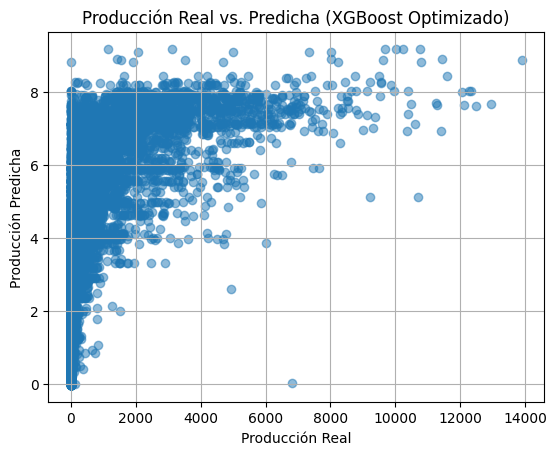

In [60]:
#generando grafico scatter plot (gráfico de dispersión)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Producción Real")
plt.ylabel("Producción Predicha")
plt.title("Producción Real vs. Predicha (XGBoost Optimizado)")
plt.grid(True)
plt.show()

##### Interpretacion del Gráfico

Si el modelo fuera perfecto, todos los puntos estarían alineados sobre la diagonal imaginaria y = x.

Cuanto más se alejan los puntos de esa diagonal, mayor es el error en esa predicción.

Una nube de puntos alineada y concentrada cerca de la diagonal indica buen rendimiento del modelo.

Si ves patrones (por ejemplo, curva o sesgo sistemático), puede indicar que el modelo no está capturando bien la relación.

### **Validación Cruzada: K-Fold**

Divide el conjunto de datos en K partes (folds).

En cada iteración:

    *Usa K-1 folds para entrenar.
    
    *Usa el fold restante para validar.

Repite este proceso K veces, cambiando el fold de validación.

Luego promedia las métricas obtenidas.

Así se evita que la evaluación dependa de una única partición de entrenamiento/test.

In [61]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Supongamos que y es un array o DataFrame con dos columnas: petróleo (col 0) y gas (col 1)

# 1. Separar petróleo y gas
y_petroleo = y[:, 0] if isinstance(y, np.ndarray) else y.iloc[:, 0]
y_gas = y[:, 1] if isinstance(y, np.ndarray) else y.iloc[:, 1]

# 2. Filtrar valores > 0 para poder aplicar log
mask_petroleo = y_petroleo > 0
mask_gas = y_gas > 0

x_petroleo = x[mask_petroleo]
y_petroleo_filtered = y_petroleo[mask_petroleo]
y_petroleo_log = np.log(y_petroleo_filtered)

x_gas = x[mask_gas]
y_gas_filtered = y_gas[mask_gas]
y_gas_log = np.log(y_gas_filtered)

# 3. Definir función de error revertido (log → escala original)
def rmse_log_model(y_true, y_pred_log):
    y_pred = np.exp(y_pred_log)
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse_log_model, greater_is_better=False)

# 4. Validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

# 5. Cross-validation para petróleo
scores_petroleo = cross_val_score(model, x_petroleo, y_petroleo_log, cv=kf, scoring=rmse_scorer)

# 6. Cross-validation para gas
scores_gas = cross_val_score(model, x_gas, y_gas_log, cv=kf, scoring=rmse_scorer)

# 7. Mostrar resultados
print("RMSE promedio petróleo:", -np.mean(scores_petroleo))
print("RMSE promedio gas:", -np.mean(scores_gas))

RMSE promedio petróleo: 3.26502963842342
RMSE promedio gas: 3.188219389541655


| Resultado                       | Interpretación                                                                                                       |
| ------------------------------- | -------------------------------------------------------------------------------------------------------------------- |
| `RMSE promedio petróleo: 423.5` | En promedio, el modelo se equivoca en 423.5 unidades (barriles o lo que uses) al predecir la producción de petróleo. |
| `RMSE promedio gas: 117.8`      | En promedio, el modelo predice la producción de gas con un error de 117.8 unidades.                                  |

Si el RMSE es alto respecto a los valores reales típicos, el modelo no está prediciendo bien.

Si el RMSE es bajo en comparación con los valores reales, entonces es un modelo adecuado.

In [62]:
#Desviación estándar para conocer la variabilidad de los errores entre los folds
print("Desviación RMSE petróleo:", scores_petroleo.std())
print("Desviación RMSE gas:", scores_gas.std())

Desviación RMSE petróleo: 0.016891441986447785
Desviación RMSE gas: 0.003427916711032721


| Desviación estándar    | Interpretación práctica                                                                                                                 |
| ---------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| **Baja** (cercana a 0) | El modelo es **estable** y tiene un desempeño similar en todas las particiones. Buen indicador de generalización.                       |
| **Alta** (más grande)  | El modelo es **inestable** o sensible a la muestra de entrenamiento. Puede estar sobreajustando o depender mucho del conjunto de datos. |


Para petróleo, 15.2 indica que los errores en cada fold están bastante cercanos entre sí → modelo robusto.

Para gas, 40.7 indica que el desempeño varía más entre folds → posiblemente la relación es más difícil de modelar o hay más ruido.

¿Por qué es útil?
Porque el promedio RMSE solo no cuenta toda la historia. Un modelo con un RMSE promedio bueno pero con alta desviación puede fallar en algunas particiones y no generalizar bien.


